In [2]:
import pandas as pd
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from geopy.distance import geodesic

In [3]:
data = pd.read_csv('query_result.csv')

In [4]:
data.head(5)

,flight_id,flight_no,scheduled_departure,scheduled_arrival,actual_flight_duration,departure_airport,departure_city,depature_longitude,departure_latitude,arrival_airport,...,range,total_seats,b_seats,c_seats,e_seats,b_tickets,c_tickets,e_tickets,total_tickets,revenues_per_flight
0,136119,PG0252,2017-01-03T10:05:00Z,2017-01-03T11:45:00Z,101.0,AAQ,Anapa,37.347301,45.002102,SVO,...,4200,130,12,0,118,11,0,102,113,1653000.0
1,136120,PG0252,2017-02-24T10:05:00Z,2017-02-24T11:45:00Z,99.0,AAQ,Anapa,37.347301,45.002102,SVO,...,4200,130,12,0,118,11,0,98,109,1605400.0
2,136122,PG0252,2017-01-08T10:05:00Z,2017-01-08T11:45:00Z,100.0,AAQ,Anapa,37.347301,45.002102,SVO,...,4200,130,12,0,118,10,0,87,97,1431000.0
3,136130,PG0252,2017-02-13T10:05:00Z,2017-02-13T11:45:00Z,99.0,AAQ,Anapa,37.347301,45.002102,SVO,...,4200,130,12,0,118,10,0,97,107,1556600.0
4,136131,PG0252,2017-01-28T10:05:00Z,2017-01-28T11:45:00Z,99.0,AAQ,Anapa,37.347301,45.002102,SVO,...,4200,130,12,0,118,12,0,112,124,1812800.0


In [5]:
# Перевод в datetime
data.scheduled_departure = data.scheduled_departure.apply(
    lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
data.scheduled_arrival = data.scheduled_arrival.apply(
    lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

In [6]:
data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   flight_id               180 non-null    int64         
 1   flight_no               180 non-null    object        
 2   scheduled_departure     180 non-null    datetime64[ns]
 3   scheduled_arrival       180 non-null    datetime64[ns]
 4   actual_flight_duration  180 non-null    float64       
 5   departure_airport       180 non-null    object        
 6   departure_city          180 non-null    object        
 7   depature_longitude      180 non-null    float64       
 8   departure_latitude      180 non-null    float64       
 9   arrival_airport         180 non-null    object        
 10  arrival_city            180 non-null    object        
 11  arrival_longitude       180 non-null    float64       
 12  arrival_latitude        180 non-null    float64   

In [7]:
# Расчет загруженности рейсов
data['occupancy'] = data.total_tickets/data.total_seats
data['occupancy_b'] = data.b_tickets/data.b_seats
data['occupancy_e'] = data.e_tickets/data.e_seats

In [8]:
# Функция возвращает дистанцию по координатам
def dist(row):
    d_lat = row['departure_latitude']
    d_long = row['depature_longitude']
    a_lat = row['arrival_latitude']
    a_long = row['arrival_longitude']
    result = geodesic((d_lat, d_long), (a_lat, a_long)).kilometers
    return result

In [9]:
# Дистанция полета
data['distance'] = data.apply(dist, axis=1)

In [10]:
# День недели полета
data['weekday'] = data.scheduled_arrival.apply(lambda x: x.weekday())

In [11]:
# Функция возващает "1" если рейс был в выходной день
def is_weekend(day):
    if day > 4:
        result = 1
    else:
        result = 0
    return result

In [12]:
# Применение функции
data['weekend'] = data.weekday.apply(is_weekend)

In [13]:
data

,flight_id,flight_no,scheduled_departure,scheduled_arrival,actual_flight_duration,departure_airport,departure_city,depature_longitude,departure_latitude,arrival_airport,...,c_tickets,e_tickets,total_tickets,revenues_per_flight,occupancy,occupancy_b,occupancy_e,distance,weekday,weekend
0,136119,PG0252,2017-01-03 10:05:00,2017-01-03 11:45:00,101.0,AAQ,Anapa,37.347301,45.002102,SVO,...,0,102,113,1653000.0,0.869231,0.916667,0.864407,1220.343367,1,0
1,136120,PG0252,2017-02-24 10:05:00,2017-02-24 11:45:00,99.0,AAQ,Anapa,37.347301,45.002102,SVO,...,0,98,109,1605400.0,0.838462,0.916667,0.830508,1220.343367,4,0
2,136122,PG0252,2017-01-08 10:05:00,2017-01-08 11:45:00,100.0,AAQ,Anapa,37.347301,45.002102,SVO,...,0,87,97,1431000.0,0.746154,0.833333,0.737288,1220.343367,6,1
3,136130,PG0252,2017-02-13 10:05:00,2017-02-13 11:45:00,99.0,AAQ,Anapa,37.347301,45.002102,SVO,...,0,97,107,1556600.0,0.823077,0.833333,0.822034,1220.343367,0,0
4,136131,PG0252,2017-01-28 10:05:00,2017-01-28 11:45:00,99.0,AAQ,Anapa,37.347301,45.002102,SVO,...,0,112,124,1812800.0,0.953846,1.000000,0.949153,1220.343367,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,136943,PG0480,2016-12-05 09:25:00,2016-12-05 10:15:00,50.0,AAQ,Anapa,37.347301,45.002102,EGO,...,0,83,94,733800.0,0.969072,0.916667,0.976471,629.829866,0,0
176,136951,PG0480,2017-02-02 09:25:00,2017-02-02 10:15:00,49.0,AAQ,Anapa,37.347301,45.002102,EGO,...,0,78,90,720600.0,0.927835,1.000000,0.917647,629.829866,3,0
177,136953,PG0480,2017-02-27 09:25:00,2017-02-27 10:15:00,50.0,AAQ,Anapa,37.347301,45.002102,EGO,...,0,85,97,765300.0,1.000000,1.000000,1.000000,629.829866,0,0
178,136956,PG0480,2017-02-04 09:25:00,2017-02-04 10:15:00,50.0,AAQ,Anapa,37.347301,45.002102,EGO,...,0,85,96,746400.0,0.989691,0.916667,1.000000,629.829866,5,1


In [14]:
# Внешние данные о самолетах
aircrafts = pd.read_excel('aircrafts.xlsx')

In [15]:
aircrafts

,model,km/litre,pilots,stewards,max_weight,leasing/year
0,Boeing 737-300,0.064,2,5,63,660000000
1,Sukhoi Superjet-100,0.391,2,2,48,200000000


In [16]:
data = data.merge(aircrafts, on='model')

In [17]:
# Расчет стоимости лизинга за полет и час стоянки
data['leasing_costs'] = data['leasing/year'] / \
    365/24*(data.actual_flight_duration/60+1)

In [18]:
# Внешние данные о аэропорновых тарифах в Анапе
airport_tariffs = pd.read_excel('airport.xlsx')

In [19]:
airport_tariffs

,type,amount
0,take off per ton,412
1,security per ton,317
2,airport per pas,66
3,service pr pas,165


In [20]:
# Расчет общей стоимости аэропортовых тарифов
data['airport_tariffs'] = data.max_weight*(airport_tariffs.amount[0] + airport_tariffs.amount[1]) + \
    data.total_seats*(airport_tariffs.amount[2] + airport_tariffs.amount[3])

In [21]:
# Данные о ценах топлива в Анапе
fuel_prices = pd.read_excel('fuel_prices.xlsx')

In [22]:
fuel_prices.month = fuel_prices.month.apply(lambda x: x.month)
fuel_prices

,month,price
0,12,38867
1,1,41435
2,2,39553


In [23]:
# Расчет потребления топлива и месяца, в котором был рейс
data['fuel_consumed'] = data.distance/data['km/litre']
data['month'] = data.scheduled_departure.apply(lambda x: x.month)

In [24]:
data = data.merge(fuel_prices, on='month')

In [25]:
# Расчет соимости топлива за полет
data['fuel_cost'] = data.fuel_consumed*data.price/1000

In [26]:
# Данные о зарплатоах пилотов и бортпроводников
wages = pd.read_excel('wages.xlsx')

In [27]:
wages

,type,wage2016,wage2017,avg_wage
0,pilot,115000,135000,121666.666667
1,steward,45000,53000,47666.666667


In [28]:
# Словарь для перевода месяца в кол-во дней
mapping_dict = {12: (date(2017, 1, 1) - date(2016, 12, 1)).days,
                1: (date(2017, 2, 1) - date(2017, 1, 1)).days,
                2: (date(2017, 3, 1) - date(2017, 2, 1)).days}

In [29]:
data.month = data.month.map(mapping_dict)

In [30]:
# Расчет соимости экипажа за полет, учитывая 8-ми часовой рабочий день и  то, что самолет проводит час между полетами на земле
data['crew_costs'] = data.pilots*wages[wages.type == 'pilot'].avg_wage[0] / \
    (8 % (data.actual_flight_duration/60+1))/data.month + data.stewards * \
    wages[wages.type == 'steward'].avg_wage[1] / \
    (8 % (data.actual_flight_duration/60+1))/data.month

In [31]:
# Расчет прибыли рейса
data['profit'] = data.revenues_per_flight - \
    (data.fuel_cost+data.airport_tariffs+data.crew_costs+data.leasing_costs)

In [32]:
# Расчет return on sales
data['profit_to_sales'] = data.profit / data.revenues_per_flight

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   flight_id               180 non-null    int64         
 1   flight_no               180 non-null    object        
 2   scheduled_departure     180 non-null    datetime64[ns]
 3   scheduled_arrival       180 non-null    datetime64[ns]
 4   actual_flight_duration  180 non-null    float64       
 5   departure_airport       180 non-null    object        
 6   departure_city          180 non-null    object        
 7   depature_longitude      180 non-null    float64       
 8   departure_latitude      180 non-null    float64       
 9   arrival_airport         180 non-null    object        
 10  arrival_city            180 non-null    object        
 11  arrival_longitude       180 non-null    float64       
 12  arrival_latitude        180 non-null    float64   

In [34]:
# Удаление лишних столбцов
scrap = data.columns[[2,5,6,7,8,9,11,12,13,15,16,17,18,19,20,21,22,23,31,32,33,34,35,38,39,40]]
data = data.drop(scrap, axis = 1)
display(scrap)

Index(['scheduled_departure', 'departure_airport', 'departure_city',
       'depature_longitude', 'departure_latitude', 'arrival_airport',
       'arrival_longitude', 'arrival_latitude', 'aircraft_code', 'range',
       'total_seats', 'b_seats', 'c_seats', 'e_seats', 'b_tickets',
       'c_tickets', 'e_tickets', 'total_tickets', 'km/litre', 'pilots',
       'stewards', 'max_weight', 'leasing/year', 'fuel_consumed', 'month',
       'price'],
      dtype='object')

In [35]:
data.profit_to_sales.describe()

count    180.000000
mean       0.527899
std        0.227484
min        0.040538
25%        0.333168
50%        0.558039
75%        0.755274
max        0.767615
Name: profit_to_sales, dtype: float64

In [36]:
data[data.profit_to_sales < data.profit_to_sales.quantile(q=0.25)]

,flight_id,flight_no,scheduled_arrival,actual_flight_duration,arrival_city,model,revenues_per_flight,occupancy,occupancy_b,occupancy_e,distance,weekday,weekend,leasing_costs,airport_tariffs,fuel_cost,crew_costs,profit,profit_to_sales
1,136122,PG0252,2017-01-08 11:45:00,100.0,Moscow,Boeing 737-300,1431000.0,0.746154,0.833333,0.737288,1220.343367,6,1,200913.242009,75957,790076.990857,5826.612903,358226.154231,0.250333
2,136131,PG0252,2017-01-28 11:45:00,99.0,Moscow,Boeing 737-300,1812800.0,0.953846,1.000000,0.949153,1220.343367,5,1,199657.534247,75957,790076.990857,310752.688172,436355.786724,0.240708
3,136159,PG0252,2017-01-04 11:45:00,98.0,Moscow,Boeing 737-300,1700600.0,0.884615,1.000000,0.872881,1220.343367,2,0,198401.826484,75957,790076.990857,155376.344086,480787.838573,0.282717
4,136164,PG0252,2017-01-07 11:45:00,99.0,Moscow,Boeing 737-300,1738400.0,0.923077,0.916667,0.923729,1220.343367,5,1,199657.534247,75957,790076.990857,310752.688172,361955.786724,0.208212
5,136172,PG0252,2017-01-15 11:45:00,99.0,Moscow,Boeing 737-300,1617600.0,0.846154,0.916667,0.838983,1220.343367,6,1,199657.534247,75957,790076.990857,310752.688172,241155.786724,0.149082
6,136178,PG0252,2017-01-29 11:45:00,99.0,Moscow,Boeing 737-300,1434600.0,0.761538,0.750000,0.762712,1220.343367,6,1,199657.534247,75957,790076.990857,310752.688172,58155.786724,0.040538
7,136181,PG0252,2017-01-31 11:45:00,99.0,Moscow,Boeing 737-300,1689600.0,0.907692,0.833333,0.915254,1220.343367,1,0,199657.534247,75957,790076.990857,310752.688172,313155.786724,0.185343
8,136185,PG0252,2017-01-14 11:45:00,103.0,Moscow,Boeing 737-300,1520000.0,0.800000,0.833333,0.796610,1220.343367,5,1,204680.365297,75957,790076.990857,6053.623796,443232.020051,0.291600
9,136202,PG0252,2017-01-05 11:45:00,102.0,Moscow,Boeing 737-300,1495600.0,0.769231,0.916667,0.754237,1220.343367,3,0,203424.657534,75957,790076.990857,5976.013234,420165.338375,0.280934
12,136275,PG0252,2017-01-13 11:45:00,98.0,Moscow,Boeing 737-300,1825000.0,0.961538,1.000000,0.957627,1220.343367,4,0,198401.826484,75957,790076.990857,155376.344086,605187.838573,0.331610


In [37]:
data.profit.describe()

count       180.000000
mean     525301.121658
std      134548.769008
min       58155.786724
25%      448115.107311
50%      541818.398433
75%      582912.731039
max      862192.431835
Name: profit, dtype: float64

In [38]:
data[data.profit < data.profit.quantile(q=0.25)]

,flight_id,flight_no,scheduled_arrival,actual_flight_duration,arrival_city,model,revenues_per_flight,occupancy,occupancy_b,occupancy_e,distance,weekday,weekend,leasing_costs,airport_tariffs,fuel_cost,crew_costs,profit,profit_to_sales
1,136122,PG0252,2017-01-08 11:45:00,100.0,Moscow,Boeing 737-300,1431000.0,0.746154,0.833333,0.737288,1220.343367,6,1,200913.242009,75957,790076.990857,5826.612903,358226.154231,0.250333
2,136131,PG0252,2017-01-28 11:45:00,99.0,Moscow,Boeing 737-300,1812800.0,0.953846,1.000000,0.949153,1220.343367,5,1,199657.534247,75957,790076.990857,310752.688172,436355.786724,0.240708
4,136164,PG0252,2017-01-07 11:45:00,99.0,Moscow,Boeing 737-300,1738400.0,0.923077,0.916667,0.923729,1220.343367,5,1,199657.534247,75957,790076.990857,310752.688172,361955.786724,0.208212
5,136172,PG0252,2017-01-15 11:45:00,99.0,Moscow,Boeing 737-300,1617600.0,0.846154,0.916667,0.838983,1220.343367,6,1,199657.534247,75957,790076.990857,310752.688172,241155.786724,0.149082
6,136178,PG0252,2017-01-29 11:45:00,99.0,Moscow,Boeing 737-300,1434600.0,0.761538,0.750000,0.762712,1220.343367,6,1,199657.534247,75957,790076.990857,310752.688172,58155.786724,0.040538
7,136181,PG0252,2017-01-31 11:45:00,99.0,Moscow,Boeing 737-300,1689600.0,0.907692,0.833333,0.915254,1220.343367,1,0,199657.534247,75957,790076.990857,310752.688172,313155.786724,0.185343
8,136185,PG0252,2017-01-14 11:45:00,103.0,Moscow,Boeing 737-300,1520000.0,0.800000,0.833333,0.796610,1220.343367,5,1,204680.365297,75957,790076.990857,6053.623796,443232.020051,0.291600
9,136202,PG0252,2017-01-05 11:45:00,102.0,Moscow,Boeing 737-300,1495600.0,0.769231,0.916667,0.754237,1220.343367,3,0,203424.657534,75957,790076.990857,5976.013234,420165.338375,0.280934
13,136282,PG0252,2017-01-16 11:45:00,101.0,Moscow,Boeing 737-300,1518800.0,0.815385,0.750000,0.822034,1220.343367,0,0,202168.949772,75957,790076.990857,5900.367497,444696.691874,0.292795
14,136293,PG0252,2017-01-23 11:45:00,99.0,Moscow,Boeing 737-300,1689600.0,0.876923,1.000000,0.864407,1220.343367,0,0,199657.534247,75957,790076.990857,310752.688172,313155.786724,0.185343


In [39]:
data.profit.sum()

94554201.89850804

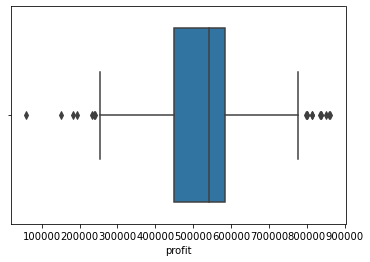

In [40]:
sns.boxplot(x='profit',  data=data, whis=1.5)

In [47]:
# Нижняя граница отсечения рейсов
IQR = data.profit.quantile(q=0.75) - data.profit.quantile(q=0.25)
bottom = data.profit.quantile(q=0.25) - 1.5*IQR
bottom

245918.67171943886

In [48]:
less_profitable_flights = data[data.profit < bottom]
less_profitable_flights

,flight_id,flight_no,scheduled_arrival,actual_flight_duration,arrival_city,model,revenues_per_flight,occupancy,occupancy_b,occupancy_e,distance,weekday,weekend,leasing_costs,airport_tariffs,fuel_cost,crew_costs,profit,profit_to_sales
5,136172,PG0252,2017-01-15 11:45:00,99.0,Moscow,Boeing 737-300,1617600.0,0.846154,0.916667,0.838983,1220.343367,6,1,199657.534247,75957,790076.990857,310752.688172,241155.786724,0.149082
6,136178,PG0252,2017-01-29 11:45:00,99.0,Moscow,Boeing 737-300,1434600.0,0.761538,0.750000,0.762712,1220.343367,6,1,199657.534247,75957,790076.990857,310752.688172,58155.786724,0.040538
18,136366,PG0252,2017-01-11 11:45:00,99.0,Moscow,Boeing 737-300,1527400.0,0.792308,0.916667,0.779661,1220.343367,2,0,199657.534247,75957,790076.990857,310752.688172,150955.786724,0.098832
26,136458,PG0252,2017-01-02 11:45:00,99.0,Moscow,Boeing 737-300,1568800.0,0.846154,0.750000,0.855932,1220.343367,0,0,199657.534247,75957,790076.990857,310752.688172,192355.786724,0.122613
62,136120,PG0252,2017-02-24 11:45:00,99.0,Moscow,Boeing 737-300,1605400.0,0.838462,0.916667,0.830508,1220.343367,4,0,199657.534247,75957,754191.268719,344047.619048,231546.577987,0.144230
63,136130,PG0252,2017-02-13 11:45:00,99.0,Moscow,Boeing 737-300,1556600.0,0.823077,0.833333,0.822034,1220.343367,0,0,199657.534247,75957,754191.268719,344047.619048,182746.577987,0.117401
126,136253,PG0252,2016-12-24 11:45:00,98.0,Moscow,Boeing 737-300,1407800.0,0.715385,0.916667,0.694915,1220.343367,5,1,198401.826484,75957,741110.713253,155376.344086,236954.116177,0.168315


In [63]:
# Список рейсов на удаление
less_profitable_flights.flight_id

5      136172
6      136178
18     136366
26     136458
62     136120
63     136130
126    136253
Name: flight_id, dtype: int64

## Для оценки значимости переменных, обучаем модель и применяем модель (дерево)

In [50]:
# Оброботка категориальных переменных
data = pd.get_dummies(data, columns=[ 'arrival_city'], dummy_na=False)
data = pd.get_dummies(data, columns=[ 'model'], dummy_na=False)
data = pd.get_dummies(data, columns=[ 'weekday'], dummy_na=False)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   flight_id                  180 non-null    int64         
 1   flight_no                  180 non-null    object        
 2   scheduled_arrival          180 non-null    datetime64[ns]
 3   actual_flight_duration     180 non-null    float64       
 4   revenues_per_flight        180 non-null    float64       
 5   occupancy                  180 non-null    float64       
 6   occupancy_b                180 non-null    float64       
 7   occupancy_e                180 non-null    float64       
 8   distance                   180 non-null    float64       
 9   weekend                    180 non-null    int64         
 10  leasing_costs              180 non-null    float64       
 11  airport_tariffs            180 non-null    int64         
 12  fuel_cos

In [52]:
data.sample(5)

,flight_id,flight_no,scheduled_arrival,actual_flight_duration,revenues_per_flight,occupancy,occupancy_b,occupancy_e,distance,weekend,...,arrival_city_Moscow,model_Boeing 737-300,model_Sukhoi Superjet-100,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
86,136441,PG0252,2017-02-03 11:45:00,100.0,1837200.0,0.984615,0.916667,0.991525,1220.343367,0,...,1,1,0,0,0,0,0,1,0,0
49,136758,PG0480,2017-01-12 10:15:00,49.0,765300.0,1.000000,1.000000,1.000000,629.829866,0,...,0,0,1,0,0,0,1,0,0,0
91,136605,PG0480,2017-02-15 10:15:00,51.0,765300.0,1.000000,1.000000,1.000000,629.829866,0,...,0,0,1,0,0,1,0,0,0,0
8,136185,PG0252,2017-01-14 11:45:00,103.0,1520000.0,0.800000,0.833333,0.796610,1220.343367,1,...,1,1,0,0,0,0,0,0,1,0
84,136411,PG0252,2017-02-04 11:45:00,100.0,1590800.0,0.846154,0.833333,0.847458,1220.343367,1,...,1,1,0,0,0,0,0,0,1,0


In [53]:
# Удаление лишних столбцов
scrap = data.columns[[0,1,2,15]]
data = data.drop(scrap, axis = 1)
display(scrap)

Index(['flight_id', 'flight_no', 'scheduled_arrival', 'profit_to_sales'], dtype='object')

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [55]:
RANDOM_SEED = 5

In [56]:
y = data.profit.values
X = data.drop(['profit'], axis=1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [58]:
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [59]:
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestRegressor(n_jobs=-1, random_state=5, verbose=1)

In [60]:
y_pred = model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 13123.418709411759


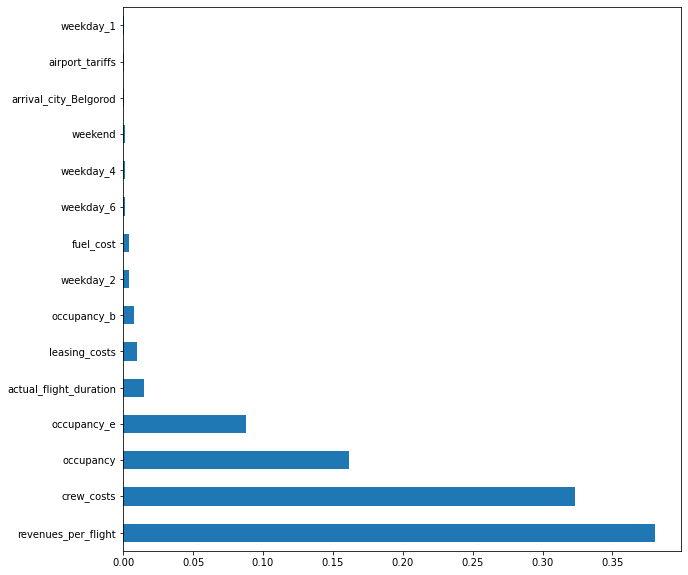

In [62]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')